In [ ]:
import h5py
from utils.utils import *
from utils.buffer import ReplayBuffer
import os

buffer = ReplayBuffer(int(1e6), int(15), int(2))

# Path: utils/buffer.py
os.path.abspath(os.getcwd())
filepath = './dataset/sac_ver2_buffer.h5'
rawpath = './dataset/sac_ver2_raw_data.h5'
# # filepath = '/datasets/offline_data_heavy_traffic_ver2.h5'
buffer.load_raw_data(rawpath)
buffer.load_buffer(filepath)



In [ ]:
import h5py
# from utils.utils import *
# from utils.buffer import ReplayBuffer
from CleanRL_agents import SACAgent
from CQL_agent import ContinuousCQL as CQL
import numpy as np
import os

# buffer = ReplayBuffer(int(1e6), int(15), int(2))

# Path: utils/buffer.py
os.path.abspath(os.getcwd())
filepath = './dataset/sac_ver2_buffer.h5'
rawpath = './dataset/sac_ver2_raw_data.h5'
# # filepath = '/datasets/offline_data_heavy_traffic_ver2.h5'
# sac_agent = SACAgent(state_dim=15, 
#                                     action_dim=2, 
#                                     hidden_dim=64,
#                                     actor_lr=0.003, 
#                                     critic_lr=0.03,
#                                     action_high=1,
#                                     action_low=0,
#                                     device='cpu')
# sac_agent.load("./models/sac_model_3_weighted_1240_best.ckpt")
# sac_agent.actor.eval()
agent = CQL(state_dim=15, action_dim=2, hidden_dim=64, target_entropy=-2,
                            q_n_hidden_layers=1, max_action=1, qf_lr=3e-4, policy_lr=6e-5,device="cuda:0")
agent.load("./models/cql_dataset_sac_best.pt")
agent.actor.eval()
# Open the file in read-only mode

with h5py.File(filepath, 'r') as f:
    # List all groups/datasets in the file
        
    # Load a specific dataset from the file
    actions = f["actions"][:]
    states = f["states"][:]

with h5py.File(rawpath, 'r') as f:
    # List all groups/datasets in the file
        
    # Load a specific dataset from the file
    raw_loads = f["loads"][:]
    raw_maxrates = f["max_rates"][:]
    raw_rates = f["rates"][:]
    raw_dvr = f["delay_violation_rates"][:]
    raw_rb_usages = f["rb_usages"][:]
    raw_owd = f["one_way_delays"][:]


num = len(states)
for i in range(num):
    action = actions[i]
    # action = np.round(action) * 25
    state = states[i]
    slice_num = len(raw_maxrates[i])
    obs = np.zeros((5, slice_num))
    max_rate = np.min(raw_maxrates[i])
    for j in range(slice_num):
            # breakpoint()
        obs_slice = np.array([raw_rates[i][j]/raw_loads[i][j],
                              raw_loads[i][j]/max_rate,
                              raw_rb_usages[i][j]/100,
                              raw_dvr[i][j]/100,
                              raw_owd[i][j]/1000])
        obs[:, j] = obs_slice
    obs = obs.flatten()
    raw_action = sac_agent.predict(obs,device='cpu')
    raw_action = np.exp(raw_action)/np.sum(np.exp(raw_action))
    # raw_action = np.round(raw_action) * 25
    max_diff = 0
    if (action - raw_action != 0).any():
        max_diff = np.max(np.max(np.abs(action - raw_action)), max_diff)
        
    print(max_diff)
    if (np.abs((state - obs)) > 1e-6).any():
        print(state - obs)

[0.00000000e+00 2.98023224e-08]
[ 0.00000000e+00 -2.98023224e-08]
[0.00000000e+00 5.96046448e-08]
[-5.96046448e-08  0.00000000e+00]
[ 0.00000000e+00 -2.98023224e-08]
[-5.96046448e-08  0.00000000e+00]
[-5.96046448e-08  2.98023224e-08]
[ 0.00000000e+00 -2.98023224e-08]
[5.96046448e-08 0.00000000e+00]
[-5.96046448e-08  0.00000000e+00]
[0.00000000e+00 2.98023224e-08]
[-5.96046448e-08  0.00000000e+00]
[5.96046448e-08 0.00000000e+00]
[0.00000000e+00 2.98023224e-08]
[ 0.00000000e+00 -2.98023224e-08]
[ 0.00000000e+00 -2.98023224e-08]
[0.00000000e+00 5.96046448e-08]
[0.00000000e+00 2.98023224e-08]
[5.96046448e-08 0.00000000e+00]
[ 0.00000000e+00 -5.96046448e-08]
[ 0.00000000e+00 -5.96046448e-08]
[-2.98023224e-08  0.00000000e+00]
[ 0.00000000e+00 -2.98023224e-08]
[-5.96046448e-08 -2.98023224e-08]
[0.00000000e+00 2.98023224e-08]
[0.00000000e+00 2.98023224e-08]
[0.00000000e+00 2.98023224e-08]
[0.00000000e+00 5.96046448e-08]
[-5.96046448e-08  0.00000000e+00]
[ 0.00000000e+00 -2.98023224e-08]
[0.000

In [ ]:
l

In [5]:
states, actions, rewards, states_, dones = test

In [6]:
states[0][6] / (states[0][1] + states[0][6])

0.2786155615323978

In [7]:
rewards

array([-0.605739  , -1.66780482, -1.45133637, -1.11356125, -1.24337744,
       -1.29013817, -0.65245823, -0.4629077 , -1.16882301, -1.17848754,
       -1.01194027, -1.48393406, -1.36285477, -1.33113701, -1.26441932])

In [9]:
actions[0]

array([0.2908839 , 0.56606972])

In [3]:
buffer.mem_cntr

1475

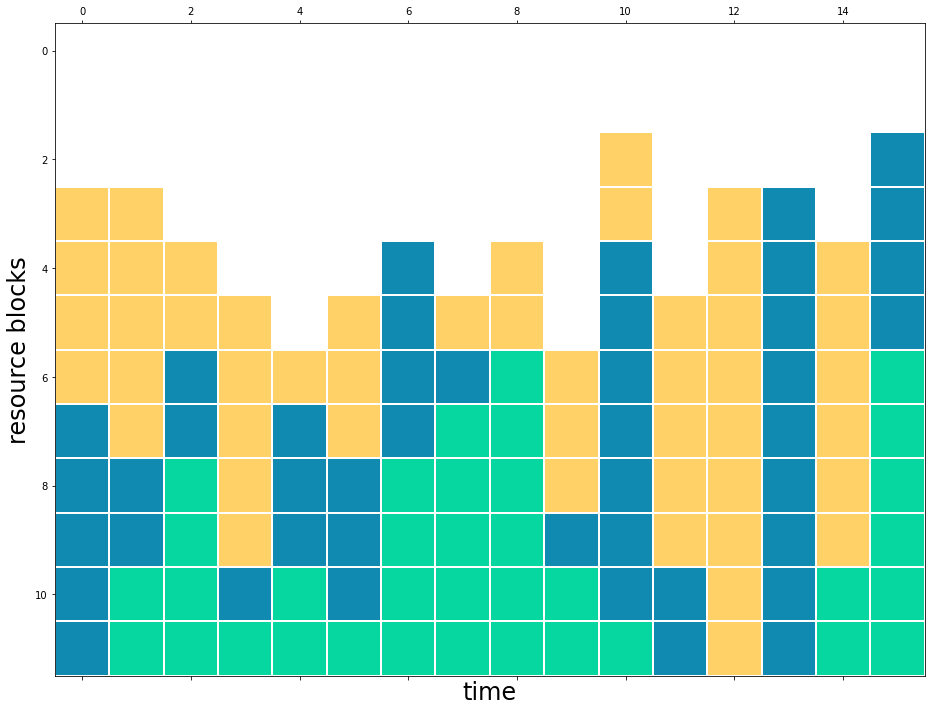

In [12]:
import matplotlib.pyplot as plt
import random
import numpy as np



# Define the new grid size
rows = 12  # Resource Blocks
cols = 16  # Time steps

# Initialize the new grid with zeros (not allocated)
new_grid = np.zeros((rows, cols), dtype=int)

# Populate the new grid randomly with slices while ensuring that same colors stay together 
# and are in the order: white > blue > yellow > red, for each time slot.
for col in range(cols):
    # Randomly decide the number of blocks for each slice and not allocated in this time slot
    white_blocks = random.randint(0, rows // 2)
    blue_blocks = random.randint(0, rows - white_blocks)
    yellow_blocks = random.randint(0, rows - white_blocks - blue_blocks)
    red_blocks = rows - white_blocks - blue_blocks - yellow_blocks
    
    # Assign the blocks to each slice and not allocated in the specified order
    new_grid[:white_blocks, col] = 0  # Not allocated
    new_grid[white_blocks:white_blocks + blue_blocks, col] = 1  # Slice 1
    new_grid[white_blocks + blue_blocks:white_blocks + blue_blocks + yellow_blocks, col] = 2  # Slice 2
    new_grid[white_blocks + blue_blocks + yellow_blocks:, col] = 3  # Slice 3



# Correct the color mapping
corrected_cmap = plt.cm.colors.ListedColormap(['white', '#FFD166', '#118AB2', '#06D6A0'])

# Create the corrected figure and axis again
fig, ax = plt.subplots(figsize=(16, 12))

# Plot the corrected grid with the corrected color map
cax = ax.matshow(new_grid, cmap=corrected_cmap)
ax.set_xticks(np.arange(-.5, cols, 1), minor=True)
ax.set_yticks(np.arange(-.5, rows, 1), minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=2)
ax.tick_params(which="minor", size=0)

# Remove the x-axis and y-axis labels
ax.set_xlabel("time", fontdict={'fontsize': 24, 'fontweight': 'medium'})
ax.set_ylabel("resource blocks", fontdict={'fontsize': 24, 'fontweight': 'medium'})
ax.set_facecolor(None)

# Add color bar with labels
# cbar = plt.colorbar(cax, ticks=[0.375, 1.125, 1.875, 2.625])
# cbar.ax.set_yticklabels(['Not Allocated', 'Slice 1', 'Slice 2', 'Slice 3'])

plt.show()
